In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

"""
importo file csv
"""
df=pd.read_csv('https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/refs/heads/main/datasets/boston.csv', index_col=0)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


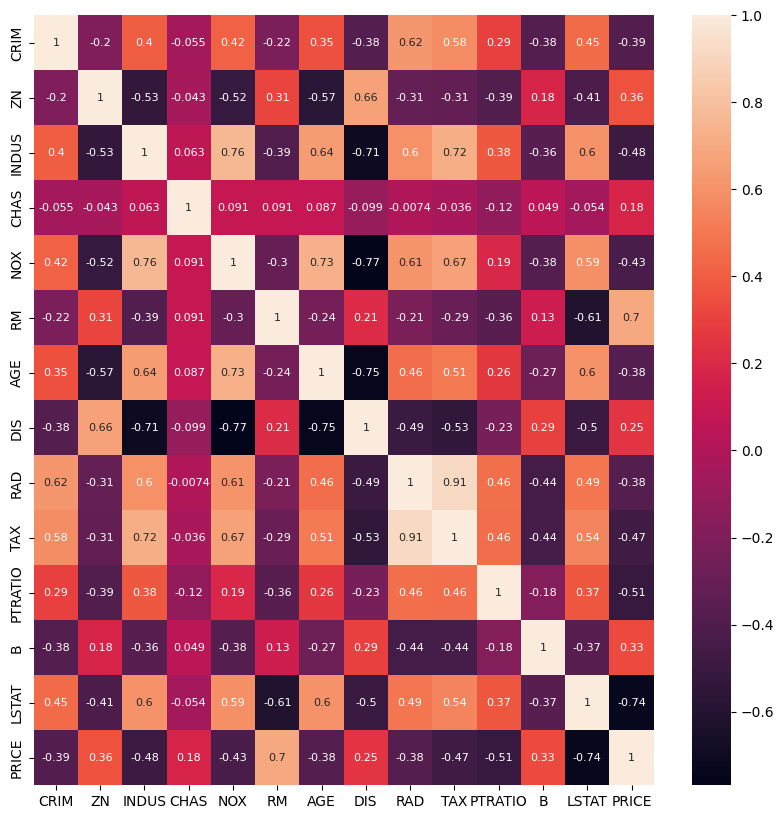

In [ ]:
"""
matrice correlazione
"""

plt.figure(figsize=(10,10))
hm = sns.heatmap(df.corr(),
                 cbar=True,
                 annot_kws={'size':8},
                 annot=True)
plt.show()

MSE:38.48296722989415
R2:0.5441462975864797


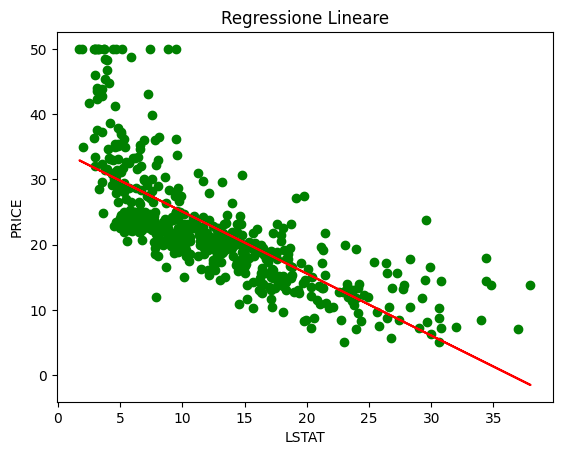

In [ ]:
"""
regressione semplice
"""
X=df['LSTAT'].values.reshape(-1,1)
y=df['PRICE'].values.reshape(-1,1)

lr=LinearRegression()
lr.fit(X,y)

y_pred=lr.predict(X)

mse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)

print(f"MSE:{mse}")
print(f"R2:{r2}")

plt.scatter(X,y, c="green")
plt.plot(X,y_pred,color='red')
plt.title('Regressione Lineare')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')

plt.show()

In [ ]:
"""
regressione lineare multipla LSTAT,RM   PRICE
"""

X=df[['LSTAT','RM']].values.reshape(-1,2)
y=df['PRICE'].values.reshape(-1,1)


lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")


"""
regressione lineare multipla PTRATIO,RM   PRICE
"""

X=df[['PTRATIO','RM']].values.reshape(-1,2)

lr=LinearRegression()
lr.fit(X,y)

y_pred=lr.predict(X)

mse=mean_squared_error(y,y_pred)
r2=r2_score(y,y_pred)

print(f"MSE:{mse}")
print(f"R2:{r2}")


MSE: 30.51246877729947
R2: 0.6385616062603403
MSE:37.03878799226831
R2:0.5612534621272918


In [ ]:
"""
regressione polinomiale LSTAT,RM,PTRATIO   PRICE
"""
X=df[['LSTAT','RM','PTRATIO']]

for d in range(1,6):
  poly=PolynomialFeatures(d,include_bias=False)
  X_poly=poly.fit_transform(X) ##creo feature polinomiali
  lr = LinearRegression()## creo modello
  lr.fit(X_poly, y)
  print(f"il grado attuale del polinomio è :{d}")
  y_pred = lr.predict(X_poly)



  """
  stampo mse e r2
  """
  mse = mean_squared_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  print(f"MSE: {mse}")
  print(f"R2: {r2}")
  print("----------------------------------------------")





il grado attuale del polinomio è :1
MSE: 27.130405758497062
R2: 0.6786241601613111
----------------------------------------------
il grado attuale del polinomio è :2
MSE: 17.174143345295775
R2: 0.7965620274818104
----------------------------------------------
il grado attuale del polinomio è :3
MSE: 15.951560822865401
R2: 0.8110442467458959
----------------------------------------------
il grado attuale del polinomio è :4
MSE: 13.91793393226719
R2: 0.8351337703491266
----------------------------------------------
il grado attuale del polinomio è :5
MSE: 12.216060668028412
R2: 0.8552934743529066
----------------------------------------------


In [ ]:
x = df.drop('PRICE', axis=1).values


lr = LinearRegression()
lr.fit(x, y)

mse=mean_squared_error(y, y_pred)
print(mse)
r2= r2_score(y, y_pred)
print(r2)

21.897779217687496
0.7406077428649428


In [ ]:
"""
cambia qualcosa normalizzando i dati?

se non cambia nulla se utilizzo il metodo dei minimi quadrati

"""

from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
x=mms.fit_transform(x)


lr=LinearRegression()
lr.fit(x,y)
y_pred=lr.predict(x)


mse=mean_squared_error(y,y_pred)
print(mse)
r2=r2_score(y,y_pred)
print(r2)

21.897779217687496
0.7406077428649428
